### Machine Learning - Modelos de Regressão

#### Nessa etapa o objetivo é construir um modelo de Machine Learning que nos ajude a prever a "Média Geral" de um candidato, baseado em alguns dados, como renda, escolaridade dos pais, status de conclusão, entre outros

#### Quando estamos lidando com o processo de previsão de um valor numérico, estamos lidadndo com problemas de Regressão

#### Nessa etapa vamos analisar alguns modelos 
- Regressão Linear
- XGBoost Regressor
- Random Forest 

#### Após essa parte mais exploratória, vamos fazer o processo mais adequado de colocar os modelos desejados em um pipeline que faz o StandardScaler, OneHotEnconder e testa os modelos desejados. Por conviniência, essa etapa será colocada primeiro

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [19]:
df_train_num = pd.read_parquet("df_train_num.parquet")
df_train_num

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,...,maquina_lavar_roupa,maquina_secar_roupa,microondas,maquina_lavar_louca,televisao,celular,computador,internet,estrato,MEDIA_GERAL
1311244,3,F,1,3,2,0,3,1.0,0,NaN,...,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,F_6.0_nan,589.94
734845,11,F,1,3,1,8,1,NaN,0,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,F_1.0_nan,NaN
2101402,17,F,0,3,1,0,1,NaN,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F_0.0_nan,468.96
3383321,13,F,1,1,1,0,1,NaN,0,NaN,...,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,F_2.0_nan,NaN
2026348,3,F,1,3,2,0,2,1.0,0,PI,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,F_0.0_PI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842261,11,F,0,3,1,10,1,NaN,0,NaN,...,1.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,F_2.0_nan,536.88
906312,2,F,1,1,3,0,1,NaN,1,NaN,...,0.0,0.0,1.0,0.0,1.0,4.0,1.0,1.0,F_3.0_nan,NaN
1501477,5,F,1,3,2,0,2,1.0,0,CE,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,F_2.0_CE,368.56
6570,2,F,1,3,2,0,2,1.0,0,RN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,F_1.0_RN,427.24


In [20]:
df_test_num = pd.read_parquet("df_test_num.parquet")
df_test_num

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,...,maquina_lavar_roupa,maquina_secar_roupa,microondas,maquina_lavar_louca,televisao,celular,computador,internet,estrato,MEDIA_GERAL
2327452,15,M,1,2,1,17,1,NaN,0,NaN,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,M_7.0_nan,650.36
2872414,16,F,1,1,1,0,1,NaN,0,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,F_1.0_nan,352.84
3194998,4,M,1,1,1,1,1,NaN,0,NaN,...,1.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,M_5.0_nan,NaN
3167411,11,M,3,3,1,7,1,NaN,0,NaN,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,M_1.0_nan,NaN
998305,2,F,1,1,2,0,2,1.0,0,SP,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,F_3.0_SP,575.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859449,8,M,1,3,2,0,2,NaN,0,CE,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,M_1.0_CE,NaN
225019,3,M,1,1,2,0,2,1.0,0,NaN,...,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,M_2.0_nan,482.48
214965,6,F,1,1,1,4,1,NaN,0,NaN,...,1.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,F_5.0_nan,NaN
185707,6,F,1,3,1,4,1,NaN,0,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,F_0.0_nan,672.58


Como estamos interessados em prever a média geral dos candidatos, não faz sentido deixar no dataset as pessoas que faltaram a prova. Por isso estamos tirando quem não esteve presente nas duas provas

In [21]:
df_train_num = df_train_num[(df_train_num['TP_PRESENCA_CH']==1) & (df_train_num['TP_PRESENCA_CN']==1)]
df_test_num = df_test_num[(df_test_num['TP_PRESENCA_CH']==1) & (df_test_num['TP_PRESENCA_CN']==1)]

print(f"shape df_train_num {df_train_num.shape} & shape df_test_num {df_test_num.shape}")

shape df_train_num (2143010, 43) & shape df_test_num (535254, 43)


In [22]:
print(f"Pessoas presentes que zeraram a prova {len(df_train_num[df_train_num['MEDIA_GERAL'] ==0])} nos dados de treino e {len(df_test_num[df_test_num['MEDIA_GERAL'] ==0])} nos dados de teste")

Pessoas presentes que zeraram a prova 15 nos dados de treino e 5 nos dados de teste


Como esses valores são muito baixos e dificultam a mensuração de algumas métricas de erro como MAPE, vamos incluir os nulos apenas numa próxima versão de melhorias das análises

In [23]:
df_train_num = df_train_num[(df_train_num['TP_PRESENCA_CH']==1) & (df_train_num['TP_PRESENCA_CN']==1) & (df_train_num['MEDIA_GERAL']>0)]
df_test_num = df_test_num[(df_test_num['TP_PRESENCA_CH']==1) & (df_test_num['TP_PRESENCA_CN']==1) & (df_test_num['MEDIA_GERAL']>0)]

print(f"shape df_train_num {df_train_num.shape} & shape df_test_num {df_test_num.shape}")

shape df_train_num (2142995, 43) & shape df_test_num (535249, 43)


#### Com os dados de treino e teste, vamos fazer agora os processamentos necessários para o modelo de machine learning 

#### Além disso, vamos aplicar um pipeline com os passos abaixo

- Scaler 
- One Hot Enconging (Transformação de categóricas para numéricas)
- Modelos de ML

In [24]:
df_train_num.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'escolaridade_pai', 'escolaridade_mae',
       'ocupacao_pai', 'ocupacao_mae', 'qtd_pessoas_residencia',
       'renda_familiar', 'empregado_domestico', 'banheiro', 'qtd_quartos',
       'carro', 'motocicleta', 'geladeira', 'freezer', 'maquina_lavar_roupa',
       'maquina_secar_roupa', 'microondas', 'maquina_lavar_louca', 'televisao',
       'celular', 'computador', 'internet', 'estrato', 'MEDIA_GERAL'],
      dtype='object')

In [25]:
categorical_features = ['SG_UF_PROVA']

numerical_features = ['TP_FAIXA_ETARIA', 'TP_ESCOLA',
       'IN_TREINEIRO', 'escolaridade_pai', 'escolaridade_mae',
       'renda_familiar', 'carro', 'motocicleta', 'computador', 'internet']

target = 'MEDIA_GERAL'

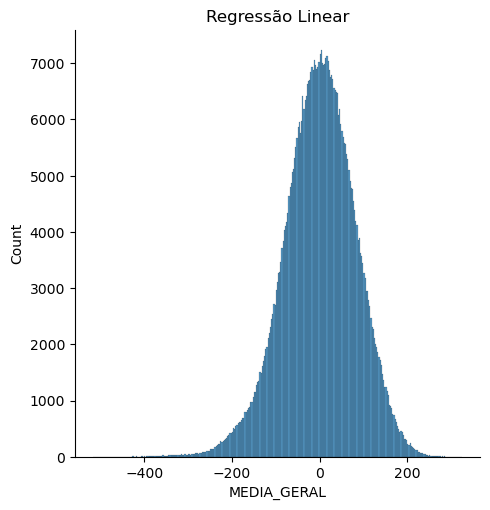

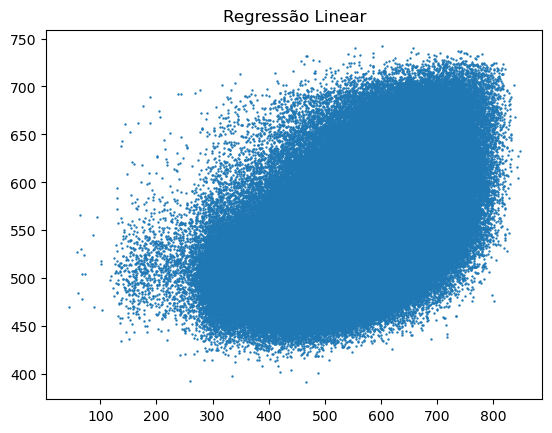


Teste:
MAE: 64.48
MAPE: 0.13
MSE: 6719.10
R²: 0.26


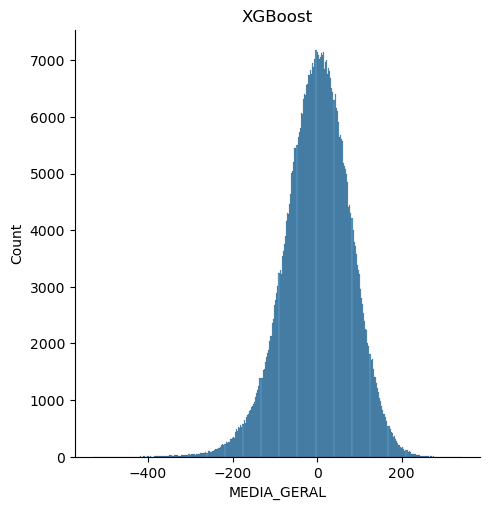

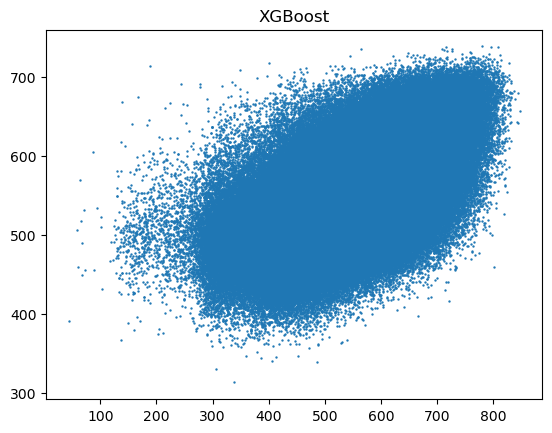


Teste:
MAE: 61.34
MAPE: 0.12
MSE: 6104.63
R²: 0.33


In [26]:
modelos = [LinearRegression(), xgb.XGBRegressor()]

for indice,modelo in enumerate(modelos):
    preprocessor = ColumnTransformer(
        transformers= [
            ('numerical', StandardScaler(), numerical_features),
            ('categorical', OneHotEncoder(), categorical_features)
        ]
    )

    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", modelo)

        ]
    )

    X_train = df_train_num[categorical_features + numerical_features]
    y_train = df_train_num[target]

    X_test = df_test_num[categorical_features + numerical_features]
    y_test = df_test_num[target]
    pipeline.fit(X_train, y_train)
    predictions =  pipeline.predict(X_test)

    if modelo == "LinearRegression()":
        modelo.coef_[0]
        df_train_num[categorical_features + numerical_features].columns.values
        coef_df = pd.DataFrame(modelo.coef_[0], df_train_num[categorical_features + numerical_features].columns.values, columns=['Coeff']).sort_values(ascending=False, by='Coeff')
        display(coef_df)

    if indice ==0:
        sns.displot((y_test - predictions))
        plt.title('Regressão Linear')
        plt.show()

        plt.scatter(y_test,predictions, s=0.5)
        plt.title('Regressão Linear')
        plt.show()
    else:
        sns.displot((y_test - predictions))
        plt.title('XGBoost')
        plt.show()

        plt.scatter(y_test,predictions, s=0.5)
        plt.title('XGBoost')
        plt.show()

    # Criando e treinando o modelo de regressão linear

    print("\nTeste:")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, predictions):.2f}")
    print(f"MSE: {mean_squared_error(y_test, predictions):.2f}")
    print(f"R²: {r2_score(y_test, predictions):.2f}")

In [10]:
#Verificando os nulos 
pd.DataFrame(df_train_num.isnull().sum()/len(df_train_num))

,0
TP_FAIXA_ETARIA,0.000000
TP_SEXO,0.000000
TP_ESTADO_CIVIL,0.000000
TP_COR_RACA,0.000000
TP_ST_CONCLUSAO,0.000000
TP_ANO_CONCLUIU,0.000000
TP_ESCOLA,0.000000
TP_ENSINO,0.615890
IN_TREINEIRO,0.000000
SG_UF_ESC,0.730573


In [11]:
df_train_num['TP_ESCOLA'].value_counts(normalize=True)

1    0.607501
2    0.309877
3    0.082622
Name: TP_ESCOLA, dtype: float64

#### Apesar do tipo de escola ter uma parcela alta de Não respondido (1), foi visto na etapa de EDA que ela aparenta ter uma forte correlação com a média geral do candidato, por isso, vamos mante-la, mas sem inputar valores, e considerar apenas com base no que foi respondido

In [12]:
df_train_num.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'escolaridade_pai', 'escolaridade_mae',
       'ocupacao_pai', 'ocupacao_mae', 'qtd_pessoas_residencia',
       'renda_familiar', 'empregado_domestico', 'banheiro', 'qtd_quartos',
       'carro', 'motocicleta', 'geladeira', 'freezer', 'maquina_lavar_roupa',
       'maquina_secar_roupa', 'microondas', 'maquina_lavar_louca', 'televisao',
       'celular', 'computador', 'internet', 'estrato', 'MEDIA_GERAL'],
      dtype='object')

### Random Forest

#### No Random Forest vamos utilizar 100 estimadores, e para evitar overfitting, comum de acontencer em algoritmos baseados em árvores, vamos setat a profundidade máxima da árvore para 3 e a amostra mínima por folha para 30

c:\Users\tonha\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


 R²: 0.2315
 MAPE: 0.1320
 RMSE: 83.5886


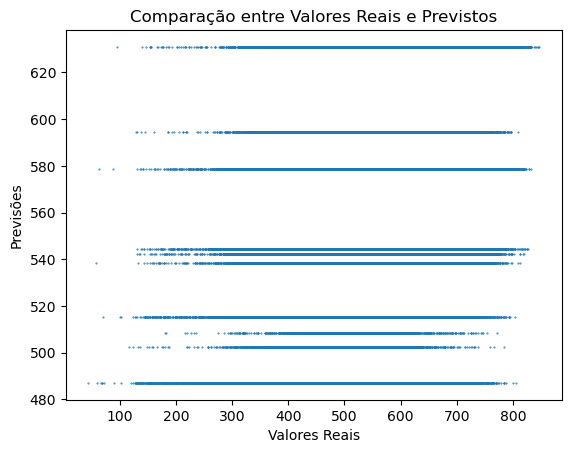

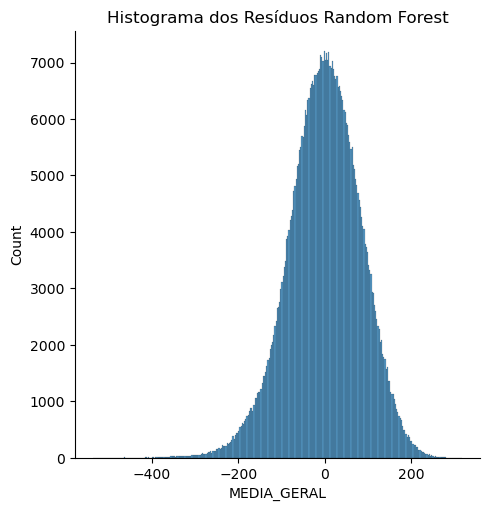

In [ ]:
cat_feat = ['SG_UF_PROVA'] #Variáveis Categóricas

num_feat = ['TP_FAIXA_ETARIA', 'TP_ESCOLA',
            'IN_TREINEIRO', 'escolaridade_pai', 'escolaridade_mae',
            'renda_familiar', 'carro', 'motocicleta', 'computador', 'internet'] #Variáveis Numéricas

target = ['MEDIA_GERAL'] #Variável que queremos prever

# Aplicando One-Hot Encoding (OHE) à coluna categórica
ohe = OneHotEncoder(drop='first', sparse=False) 
encoded_cats = ohe.fit_transform(df_train_num[cat_feat])

# Criando DataFrame com as colunas One-Hot Encoded
encoded_df_train = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(cat_feat), index=df_train_num.index)
encoded_df_test = pd.DataFrame(ohe.transform(df_test_num[cat_feat]), columns=ohe.get_feature_names_out(cat_feat), index=df_test_num.index)

# Concatenando as colunas originais e as novas colunas OHE
X_train = pd.concat([df_train_num[num_feat], encoded_df_train], axis=1)
X_test = pd.concat([df_test_num[num_feat], encoded_df_test], axis=1)

y_train = df_train_num[target]
y_test = df_test_num[target]

# Criando o modelo
model = RandomForestRegressor(n_estimators=100, max_depth=3, min_samples_leaf=30)

# Treinando com os dados corretos
model.fit(X_train, y_train.values.ravel())

# Fazendo previsões
test_predictions = model.predict(X_test)

# Calculando métricas
r2 = r2_score(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)
rmse = mean_squared_error(y_test, test_predictions, squared=False) 

print(f" R²: {r2:.4f}")
print(f" MAPE: {mape:.4f}")
print(f" RMSE: {rmse:.4f}")

# Plotando scatterplot para comparação real vs previsto
plt.scatter(y_test, test_predictions, s=0.2)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Comparação entre Valores Reais e Previstos")
plt.show()

sns.displot(y_test['MEDIA_GERAL'] - test_predictions)
plt.title("Histograma dos Resíduos Random Forest")
plt.show()

### Regressão Linear

c:\Users\tonha\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Treino:
MAPE: 0.129
MSE: 6716.189
R²: 0.259

Teste:
MAPE: 0.129
MSE: 6719.133
R²: 0.261


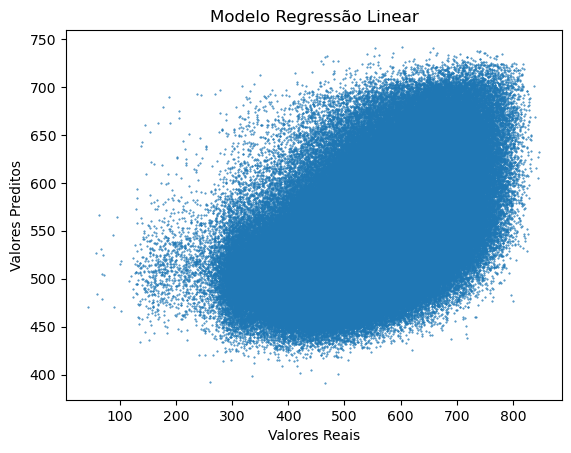

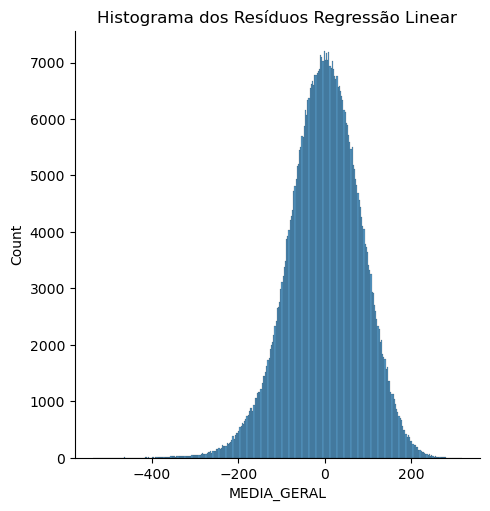

In [ ]:
cat_feat = ['SG_UF_PROVA'] #Variáveis Categóricas

num_feat = ['TP_FAIXA_ETARIA', 'TP_ESCOLA',
            'IN_TREINEIRO', 'escolaridade_pai', 'escolaridade_mae',
            'renda_familiar', 'carro', 'motocicleta', 'computador', 'internet'] #Variáveis Numéricas

target = ['MEDIA_GERAL'] #Variável que queremos prever

# Aplicando One-Hot Encoding (OHE) à coluna categórica
ohe = OneHotEncoder(drop='first', sparse=False) 
encoded_cats = ohe.fit_transform(df_train_num[cat_feat])

# Criando DataFrame com as colunas One-Hot Encoded
encoded_df_train = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(cat_feat), index=df_train_num.index)
encoded_df_test = pd.DataFrame(ohe.transform(df_test_num[cat_feat]), columns=ohe.get_feature_names_out(cat_feat), index=df_test_num.index)

# Concatenando as colunas originais e as novas colunas OHE
X_train = pd.concat([df_train_num[num_feat], encoded_df_train], axis=1)
X_test = pd.concat([df_test_num[num_feat], encoded_df_test], axis=1)

y_train = df_train_num[target]
y_test = df_test_num[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

train_preds = lr_model.predict(X_train_scaled)
test_preds = lr_model.predict(X_test_scaled)

# Avaliação do modelo
print("Treino:")
print(f"MAPE: {mean_absolute_percentage_error(y_train, train_preds):.3f}")
print(f"MSE: {mean_squared_error(y_train, train_preds):.3f}")
print(f"R²: {r2_score(y_train, train_preds):.3f}")

print("\nTeste:")
print(f"MAPE: {mean_absolute_percentage_error(y_test, test_preds):.3f}")
print(f"MSE: {mean_squared_error(y_test, test_preds):.3f}")
print(f"R²: {r2_score(y_test, test_preds):.3f}")

plt.scatter(y_test,test_preds, s=0.2) # Vamos diminuir o tamanho dos pontos, devido a quantidade
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Modelo Regressão Linear")
plt.show()

sns.displot(y_test['MEDIA_GERAL'] - test_predictions)
plt.title("Histograma dos Resíduos Regressão Linear")
plt.show()

#### Vamos fazer uma análise dos coeficientes na regressão linear: 

In [48]:
# Criando um DataFrame com os coeficientes da regressão
coef_df = pd.DataFrame(
    lr_model.coef_.flatten(),  # Flatten para converter em vetor 1D
    index=X_train.columns,
    columns=["Coeficiente"]
).sort_values(by="Coeficiente", ascending=False)

# Exibir os coeficientes ordenados
print("Features com maiores coeficientes positivos")
display(coef_df[:5])
print('\n')
print("Features com maiores coeficientes negativos")
display(coef_df[-5:])

# # Plotando os coeficientes
# plt.figure(figsize=(10, 5))
# coef_df[:10].plot(kind="bar", figsize=(12, 5), title="Coeficientes da Regressão Linear")
# plt.ylabel("Valor do Coeficiente")
# plt.xlabel("Features")
# plt.xticks(rotation=90)
# plt.show()

Features com maiores coeficientes positivos


,Coeficiente
renda_familiar,26.168425
computador,16.217042
escolaridade_mae,9.038096
SG_UF_PROVA_MG,8.545550
SG_UF_PROVA_SP,5.462679




Features com maiores coeficientes negativos


,Coeficiente
SG_UF_PROVA_AM,-1.694827
motocicleta,-3.736480
TP_ESCOLA,-7.411871
TP_FAIXA_ETARIA,-7.878661
IN_TREINEIRO,-14.227274


#### XGBoost Regressor

#### Para evitar overfitting nesse modelo, colocamos a profundidade máxima da árvore como 3, e learning_rate=0.05

MSE: 6242.117
MAE: 62.126
MAPE: 12.4431%


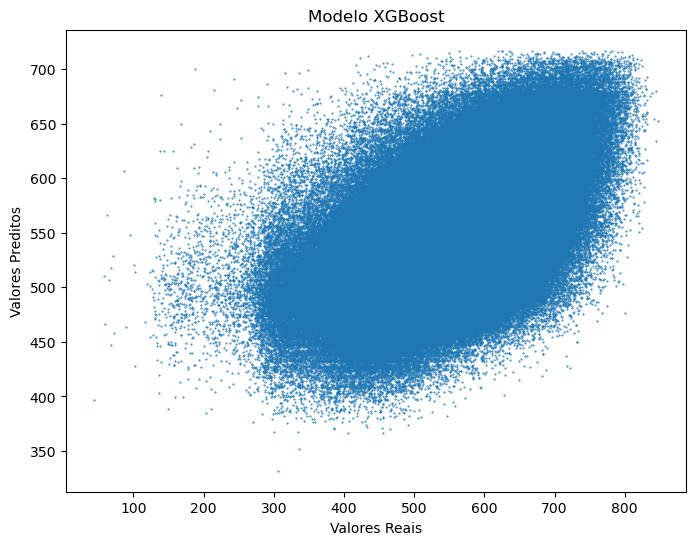

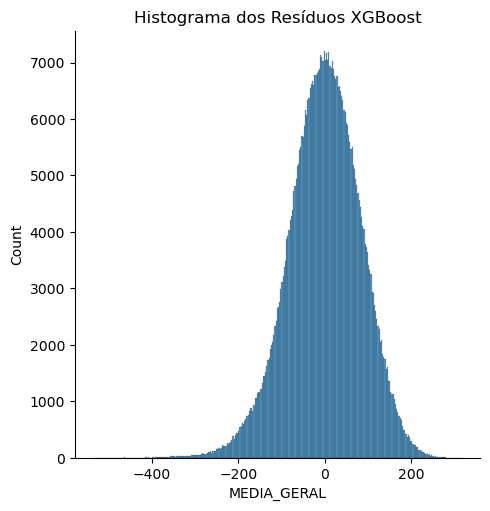

<Figure size 1000x600 with 0 Axes>

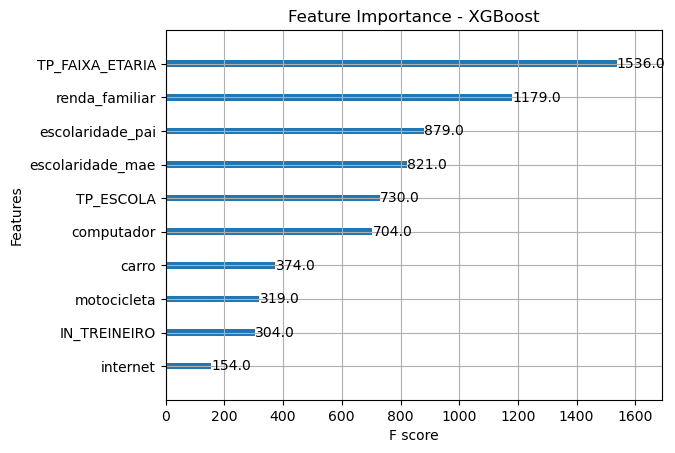

In [54]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

cat_feat = ['SG_UF_PROVA'] #Variáveis Categóricas

num_feat = ['TP_FAIXA_ETARIA', 'TP_ESCOLA',
            'IN_TREINEIRO', 'escolaridade_pai', 'escolaridade_mae',
            'renda_familiar', 'carro', 'motocicleta', 'computador', 'internet'] #Variáveis Numérocas

target = ['MEDIA_GERAL'] #Variável que queremos prever

X_train = df_train_num[num_feat]
y_train = df_train_num[target]

X_test = df_test_num[num_feat]
y_test = df_test_num[target]

# Treinar o modelo XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train, y_train)

# Fazer previsões
y_pred = model_xgb.predict(X_test)
y_test_array = y_test

# Calcular métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
#mape = np.mean(np.abs((y_test_array - y_pred) / y_test_array)) * 100
#mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.4f}%")

# Scatter plot de comparação
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=0.2)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle="--")  # Linha de referência
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Modelo XGBoost")
plt.show()

sns.displot(y_test['MEDIA_GERAL'] - test_predictions)
plt.title("Histograma dos Resíduos XGBoost")
plt.show()

plt.figure(figsize=(10, 6))
xgb.plot_importance(model_xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance - XGBoost")
plt.show()

#### Conclusões e Perspectivas Futuras:

##### Nas análises os melhores resultados dentre os três modelos testados foram Random Forest e XGBoost, por isso, escolhemos os dois como os modelos escolhidos para o pipeline

##### Também analisamos as features mais importantes para o modelo analisando os coeficientes da Regressão Linear e a Feature Importance no XGBoost

##### Os Resultados da modelgem foram bastante satisfatórios, com percentual de erro absoluto médio de 12%

#### Como Perspectivas Futuras temos:

- Testar novos modelos 
- Fazer uma otimização de hiperparâmetros utilizando Bayseian Search ou Outros Métodos
- Fazer Feature Selection com outros métodos, como "Permutaion Importance" 
